<a href="https://colab.research.google.com/github/ahdonjuan/r-basic/blob/master/Ejercicio%20en%20py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
from scipy.stats import poisson, gamma

# Simular los datos
np.random.seed(42)  # para reproducibilidad
n_muestras = 1000
frecuencia = np.random.poisson(lam=0.5, size=n_muestras)  # Frecuencia de Poisson
severidad = np.random.gamma(shape=2, scale=1000, size=n_muestras)  # Severidad de Gamma
reclamos = frecuencia * severidad
datos = pd.DataFrame({'Frecuencia': frecuencia, 'Severidad': severidad, 'Reclamos': reclamos})



In [4]:
datos

,Frecuencia,Severidad,Reclamos
0,0,2850.970624,0.000000
1,2,2056.677289,4113.354578
2,0,870.494077,0.000000
3,0,1329.941858,0.000000
4,0,688.453823,0.000000
...,...,...,...
995,1,2136.381822,2136.381822
996,1,1474.155851,1474.155851
997,1,217.728899,217.728899
998,0,784.396336,0.000000


In [5]:
# Ajustar modelos para la distribución de frecuencia y severidad
modelo_freq = {'poisson_lambda': np.mean(datos['Frecuencia'])}  # Asumiendo Poisson
modelo_sev = {'gamma_shape': np.mean(datos['Severidad']) / np.var(datos['Severidad']),
              'gamma_scale': np.var(datos['Severidad']) / np.mean(datos['Severidad'])}  # Asumiendo Gamma




In [6]:
# Calcular valores VAR y TVAR de forma empírica
var_levels = [0.9, 0.95, 0.99]
tvar_levels = [0.9, 0.95, 0.99]
var_values = {}
tvar_values = {}

for level in var_levels:
    var_values[level] = np.percentile(reclamos, 100 - level * 100)

for level in tvar_levels:
    tvar_values[level] = np.percentile(reclamos[reclamos > 0], 100 - level * 100)



In [7]:
# Resultados
print("Modelo de Frecuencia:")
print(modelo_freq)
print("\nModelo de Severidad:")
print(modelo_sev)
print("\nValores VAR:")
print(var_values)
print("\nValores TVAR:")
print(tvar_values)

Modelo de Frecuencia:
{'poisson_lambda': 0.516}

Modelo de Severidad:
{'gamma_shape': 0.001011610040451778, 'gamma_scale': 988.5232055955147}

Valores VAR:
{0.9: 0.0, 0.95: 0.0, 0.99: 0.0}

Valores TVAR:
{0.9: 620.2008956225162, 0.95: 462.3151963586022, 0.99: 146.2788739590061}


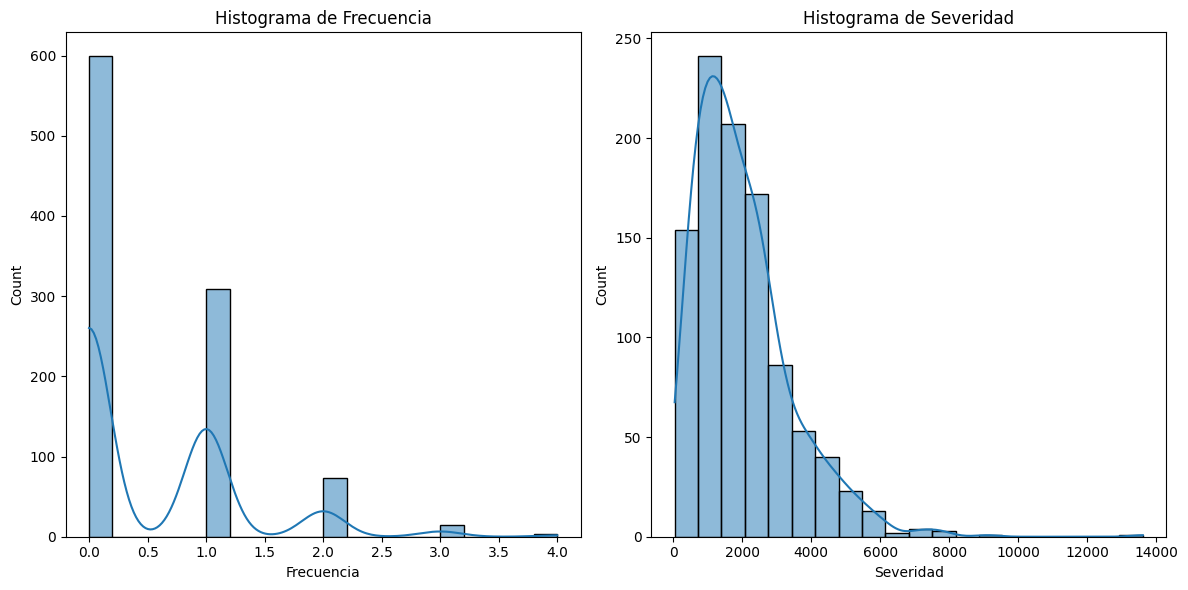

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [10]:


# Visualización de los datos
plt.figure(figsize=(12, 6))

# Histograma de frecuencia
plt.subplot(1, 2, 1)
sns.histplot(datos['Frecuencia'], bins=20, kde=True)
plt.title('Histograma de Frecuencia')

# Histograma de severidad
plt.subplot(1, 2, 2)
sns.histplot(datos['Severidad'], bins=20, kde=True)
plt.title('Histograma de Severidad')

plt.tight_layout()
plt.show()

# Visualización de los resultados
plt.figure(figsize=(12, 6))


